In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
   
from prepare_data import get_data

## Timeseries forecasting with years as time steps (SARIMAX model)

In [10]:
based_on = None
data = get_data(based_on=based_on)
data.merge_data()
df_merged = data.df_merged
print(df_merged.columns)
print(df_merged.shape)

Index(['Carbon Emissions_x', 'Education Expenditure_x',
       'Foreign Direct Investment (FDI) Inflows_x', 'GDP_x',
       'Health Expenditure_x', 'Inflation Rate_x', 'Internet Penetration_x',
       'Life Expectancy_x', 'Renewable Energy Production_x',
       'Unemployment Rate_x', 'Carbon Emissions_y', 'Education Expenditure_y',
       'Foreign Direct Investment (FDI) Inflows_y', 'GDP_y',
       'Health Expenditure_y', 'Inflation Rate_y', 'Internet Penetration_y',
       'Life Expectancy_y', 'Renewable Energy Production_y',
       'Unemployment Rate_y', 'Value'],
      dtype='object')
(14742, 21)


Visualize one flow through the years

Index(['Country_x', 'Year', 'Carbon Emissions_x', 'Education Expenditure_x',
       'Foreign Direct Investment (FDI) Inflows_x', 'GDP_x',
       'Health Expenditure_x', 'Inflation Rate_x', 'Internet Penetration_x',
       'Life Expectancy_x', 'Renewable Energy Production_x',
       'Unemployment Rate_x', 'Country_y', 'Carbon Emissions_y',
       'Education Expenditure_y', 'Foreign Direct Investment (FDI) Inflows_y',
       'GDP_y', 'Health Expenditure_y', 'Inflation Rate_y',
       'Internet Penetration_y', 'Life Expectancy_y',
       'Renewable Energy Production_y', 'Unemployment Rate_y', 'CO2', 'COU',
       'Value'],
      dtype='object')
(14742, 26)


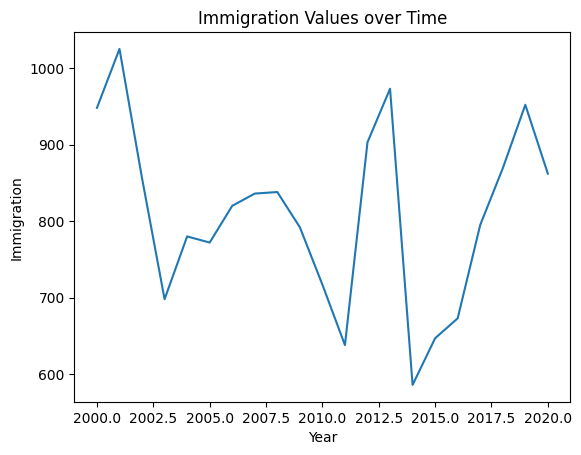

In [11]:
data.merge_data(vis=True)
df_merged = data.df_merged
print(df_merged.columns)
print(df_merged.shape)

country1 = "FRA"
country2 = "BEL"

if based_on == "CO2":
    plt.plot(df_merged['Year'].loc[(df_merged["Country"]==country1)&(df_merged["COU"]==country2)], df_merged['Value'].loc[(df_merged["Country"]==country1)&(df_merged["COU"]==country2)])
elif based_on == "COU":
    plt.plot(df_merged['Year'].loc[(df_merged["Country"]==country1)&(df_merged["CO2"]==country2)], df_merged['Value'].loc[(df_merged["Country"]==country1)&(df_merged["CO2"]==country2)])
else:
    plt.plot(df_merged['Year'].loc[(df_merged["Country_x"]==country1)&(df_merged["Country_y"]==country2)], df_merged['Value'].loc[(df_merged["Country_x"]==country1)&(df_merged["Country_y"]==country2)])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Immigration')
plt.title('Immigration Values over Time')

# Displaying the plot
plt.show()

In [12]:
data.merge_data()
df_merged = data.df_merged
mode= "class"
q = 5
data.create_X_y(q=q,mode=mode)

# Train-Test Split
class_labels = data.class_labels
normalized_features = data.normalized_features

train_size = int(len(df_merged) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = class_labels[:train_size], class_labels[train_size:]
exog_train, exog_test = normalized_features[:train_size], normalized_features[train_size:]

In [13]:
order = (1, 0, 0)  # Set the order of the non-seasonal part of the model
seasonal_order = (1, 0, 0, 12)  # Set the order of the seasonal part of the model
model = sm.tsa.SARIMAX(train_data, order=order, seasonal_order=seasonal_order, exog=exog_train)
fitted_model = model.fit()

c:\Users\marti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
if mode == "reg":
    test_data = pd.Series(test_data.flatten())
predictions = fitted_model.predict(start=test_data.index[0], end=test_data.index[-1], exog=exog_test)

In [15]:
if mode=="class":
    # Calculate evaluation metrics
    classification_metrics = classification_report(test_data, list(round(predictions)))
    print("Classification Report:\n", classification_metrics)
else:
    # Plot the actual vs. predicted values for the test data
    plt.scatter(test_data, predictions)
    plt.plot([test_data.min(), test_data.max()], [test_data.min(), test_data.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted Values')
    plt.show()

    # Calculate the mean squared error
    mse = mean_squared_error(test_data, predictions)
    print("Mean Squared Error:", mse)

Classification Report:
               precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.62      0.21      0.32       668
         1.0       0.25      0.35      0.29       483
         2.0       0.28      0.57      0.37       553
         3.0       0.12      0.04      0.06       559
         4.0       0.61      0.07      0.12       686
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0

    accuracy                           0.24      2949
   macro avg       0.13      0.09      0.08      2949
weighted avg       0.40      0.24      0.23      2949



c:\Users\marti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
